<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220609.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* regression
* customer analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotnine as gg
from plotnine import ggplot, aes
from datetime import datetime, date, time, timezone, timedelta 
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, f1_score, mean_squared_error
import sklearn.datasets as skd

# regression

In [7]:
raw = skd.load_breast_cancer()
raw.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [10]:
x = pd.DataFrame(raw['data'], columns = raw['feature_names'])
y = raw['target']
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, train_size = .7)

In [13]:
fit_rf = RandomForestClassifier().fit(x_tr, y_tr)
pred_rf = fit_rf.predict(x_te)
proba_rf = fit_rf.predict_proba(x_te)[:,-1]

In [14]:
accuracy_score(y_te, pred_rf)

0.9590643274853801

In [15]:
frp, trp, thre = roc_curve(y_te, proba_rf)

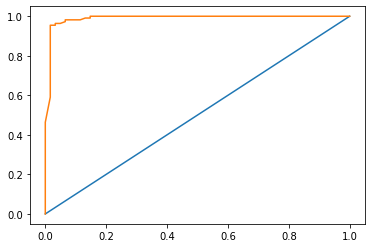

In [16]:
plt.plot([0,1],[0,1])
plt.plot(frp, trp)

# customer analysis

In [17]:
os.listdir()

['.config',
 'retail_data_response.csv',
 'rfm_test.csv',
 'retail_data_transactions.csv',
 'online_retail_II.xlsx',
 'ecommerce-data.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'sample_data']

In [32]:
df = pd.read_csv('ecommerce-data.csv', encoding = 'unicode_escape')

In [33]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [34]:
df.columns = [a.lower() for a in df.columns]
df.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [35]:
df = df[~(df['invoiceno'].str.contains('C')) & (df['country'] == 'United Kingdom')]
df.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [36]:
df['invoicedate'] = pd.to_datetime(df['invoicedate'])
df['rev'] = df['unitprice'] * df['quantity']
df['month'] = df['invoicedate'].to_numpy().astype('datetime64[M]')
df['date'] = df['invoicedate'].to_numpy().astype('datetime64[D]')
df.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,rev,month,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01


In [37]:
df = df[['customerid', 'invoicedate', 'month', 'date','rev']]
df.head()

,customerid,invoicedate,month,date,rev
0,17850.0,2010-12-01 08:26:00,2010-12-01,2010-12-01,15.30
1,17850.0,2010-12-01 08:26:00,2010-12-01,2010-12-01,20.34
2,17850.0,2010-12-01 08:26:00,2010-12-01,2010-12-01,22.00
3,17850.0,2010-12-01 08:26:00,2010-12-01,2010-12-01,20.34
4,17850.0,2010-12-01 08:26:00,2010-12-01,2010-12-01,20.34


In [38]:
df = df.sort_values(['customerid', 'invoicedate'], ascending=[0, 1])
df.head()

,customerid,invoicedate,month,date,rev
198716,18287.0,2011-05-22 10:39:00,2011-05-01,2011-05-22,10.2
198717,18287.0,2011-05-22 10:39:00,2011-05-01,2011-05-22,10.2
198718,18287.0,2011-05-22 10:39:00,2011-05-01,2011-05-22,10.2
198719,18287.0,2011-05-22 10:39:00,2011-05-01,2011-05-22,15.0
198720,18287.0,2011-05-22 10:39:00,2011-05-01,2011-05-22,15.0


In [40]:
df2 = df.groupby(['customerid', 'date'])['rev'].sum().reset_index()
df2.head()

,customerid,date,rev
0,12346.0,2011-01-18,77183.60
1,12747.0,2010-12-05,358.56
2,12747.0,2010-12-13,347.71
3,12747.0,2011-01-20,303.04
4,12747.0,2011-03-01,310.78


In [41]:
df2['month'] = df2['date'].to_numpy().astype('datetime64[M]')
df2.head()

,customerid,date,rev,month
0,12346.0,2011-01-18,77183.60,2011-01-01
1,12747.0,2010-12-05,358.56,2010-12-01
2,12747.0,2010-12-13,347.71,2010-12-01
3,12747.0,2011-01-20,303.04,2011-01-01
4,12747.0,2011-03-01,310.78,2011-03-01


In [140]:
info_mf = df2.groupby(['customerid', 'month']).agg({'rev' : 'sum', 'date':'size'}).reset_index()
info_r = df2.assign(r = df2.groupby(['customerid'])['date'].apply(lambda x : x - x.shift()))
#info_f = df2.groupby(['customerid', 'month']).agg({'date':'size'}).reset_index()

In [143]:
info_mf.head()

,customerid,month,rev,date
0,12346.0,2011-01-01,77183.60,1
1,12747.0,2010-12-01,706.27,2
2,12747.0,2011-01-01,303.04,1
3,12747.0,2011-03-01,310.78,1
4,12747.0,2011-05-01,771.31,2


In [146]:
info_mf.columns = ['customerid', 'month', 'money', 'freq']
info_mf = info_mf.groupby(['customerid']).first().reset_index()
info_mf.head()

,customerid,month,money,freq
0,12346.0,2011-01-01,77183.60,1
1,12747.0,2010-12-01,706.27,2
2,12748.0,2010-12-01,4228.13,14
3,12749.0,2011-05-01,859.10,1
4,12820.0,2011-01-01,170.46,1


In [150]:
info_r = info_r[['customerid', 'month', 'r']]
info_r.columns = ['customerid', 'month', 'recency']
info_r = info_r.groupby(['customerid']).first().reset_index()
info_r.head()


,customerid,month,recency
0,12346.0,2011-01-01,NaT
1,12747.0,2010-12-01,8 days
2,12748.0,2010-12-01,1 days
3,12749.0,2011-05-01,83 days
4,12820.0,2011-01-01,252 days


In [157]:
info = pd.merge(info_r, info_mf, how = 'left', on = ['customerid', 'month'])
info.head()

,customerid,month,recency,money,freq
0,12346.0,2011-01-01,NaT,77183.60,1
1,12747.0,2010-12-01,8 days,706.27,2
2,12748.0,2010-12-01,1 days,4228.13,14
3,12749.0,2011-05-01,83 days,859.10,1
4,12820.0,2011-01-01,252 days,170.46,1


In [162]:
info = info[~info['recency'].isnull()]
info.head()

,customerid,month,recency,money,freq
1,12747.0,2010-12-01,8 days,706.27,2
2,12748.0,2010-12-01,1 days,4228.13,14
3,12749.0,2011-05-01,83 days,859.10,1
4,12820.0,2011-01-01,252 days,170.46,1
6,12822.0,2011-09-01,17 days,948.88,2


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


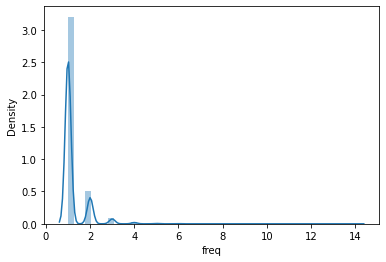

In [169]:
sns.distplot(info['freq'])

In [174]:
info.assign(r = pd.qcut(info['recency'], 5, labels = list('ABCDE')),
          m = pd.qcut(info['money'], 5, labels = list('ABCDE'))
          )


,customerid,month,recency,money,freq,r,m
1,12747.0,2010-12-01,8 days,706.27,2,A,E
2,12748.0,2010-12-01,1 days,4228.13,14,A,E
3,12749.0,2011-05-01,83 days,859.10,1,D,E
4,12820.0,2011-01-01,252 days,170.46,1,E,B
6,12822.0,2011-09-01,17 days,948.88,2,A,E
...,...,...,...,...,...,...,...
3910,18272.0,2011-04-01,21 days,980.54,2,B,E
3911,18273.0,2011-03-01,162 days,51.00,1,E,A
3918,18282.0,2011-08-01,119 days,100.21,1,D,A
3919,18283.0,2011-01-01,17 days,215.00,2,A,B
